In [121]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
seed = 42

In [122]:
data = pd.read_csv("datass/dataset.csv")

In [123]:
data = data[(data['Education_Level'] != 'Unknown') 
            & (data['Income_Category'] != 'Unknown') 
            & (data['Marital_Status'] != 'Unknown')]


In [124]:
variables_to_keep = [
    'Gender',
    'Income_Category',
    'Marital_Status',
    'Education_Level',
    'Attrition_Flag'
]
data_subset = data.loc[:, variables_to_keep]


In [125]:
# Conversione delle variabili categoriche in tipo "category"
data_subset['Gender'] = data_subset['Gender'].astype('category')
data_subset['Income_Category'] = data_subset['Income_Category'].astype('category')
data_subset['Marital_Status'] = data_subset['Marital_Status'].astype('category')
data_subset['Education_Level'] = data_subset['Education_Level'].astype('category')
data_subset['Attrition_Flag'] = data_subset['Attrition_Flag'].astype('category')

# Stampa dei tipi di dati delle colonne nel dataset
print(data_subset.dtypes)

Gender             category
Income_Category    category
Marital_Status     category
Education_Level    category
Attrition_Flag     category
dtype: object


In [126]:
data_subset.shape

(7081, 5)

In [127]:
#data_subset = data_subset[data_subset['Attrition_Flag'] != 'Existing Customer']
df = pd.DataFrame()
# Creazione di un oggetto LabelEncoder
label_encoder = LabelEncoder()

# Codifica delle categorie in numeri
df['Gender'] = label_encoder.fit_transform(data_subset['Gender'])
df['Income_Category'] = label_encoder.fit_transform(data_subset['Income_Category'])
df['Marital_Status'] = label_encoder.fit_transform(data_subset['Marital_Status'])
df['Education_Level'] = label_encoder.fit_transform(data_subset['Education_Level'])
df['Attrition_Flag'] = label_encoder.fit_transform(data_subset['Attrition_Flag'])*6
print(df.dtypes)

Gender             int32
Income_Category    int32
Marital_Status     int32
Education_Level    int32
Attrition_Flag     int32
dtype: object


In [128]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

# Stampa i centroidi dei cluster
print(kmeans.cluster_centers_)

[[0.3622449  3.69597839 1.33883553 2.57623049 6.        ]
 [0.48247978 2.65318958 1.35938904 2.54806828 0.        ]
 [0.74430956 1.18512898 1.32245827 2.5883915  6.        ]]


In [129]:
import warnings
warnings.filterwarnings("ignore")

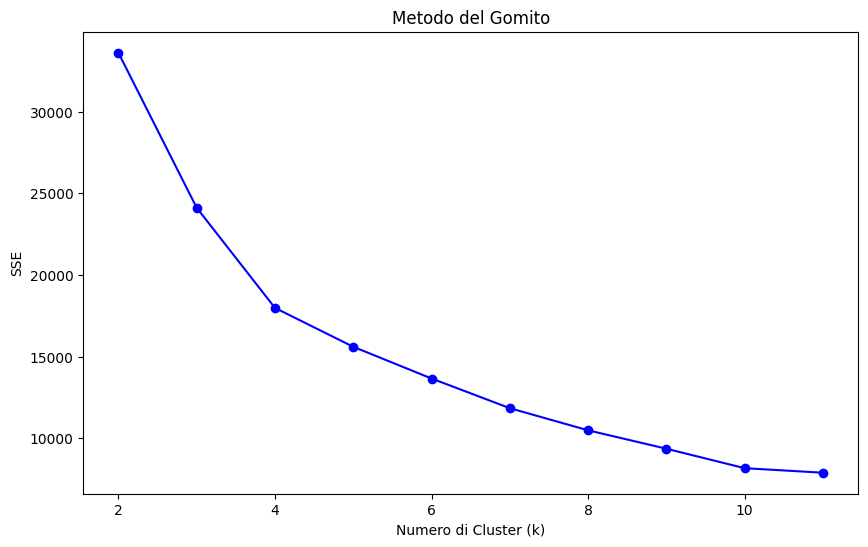

In [130]:
sse = []
k_values = range(2, 12)  # valori di k da testare

# Esegui il k-means clustering per vari valori di k
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)  # SSE

# Visualizza la curva del metodo del gomito
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, 'bo-')
plt.xlabel('Numero di Cluster (k)')
plt.ylabel('SSE')
plt.title('Metodo del Gomito')
plt.show()


In [141]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df)
labels = kmeans.labels_
data_subset['Cluster_Labels'] = labels

<Figure size 800x600 with 0 Axes>

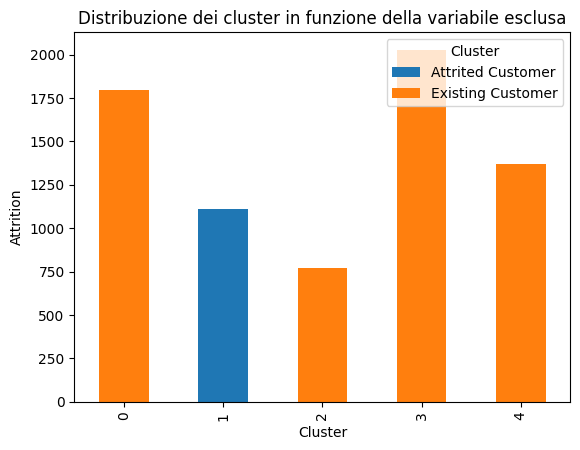

In [142]:
plt.figure(figsize=(8, 6))
ax = data_subset.groupby('Cluster_Labels')['Attrition_Flag'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Cluster')
plt.ylabel('Attrition')
plt.title('Distribuzione dei cluster in funzione della variabile esclusa')
plt.legend(title='Cluster')

plt.show()

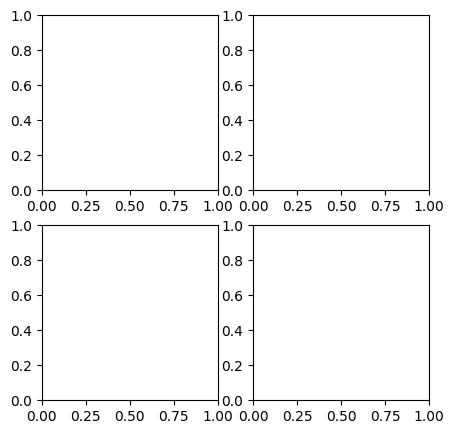

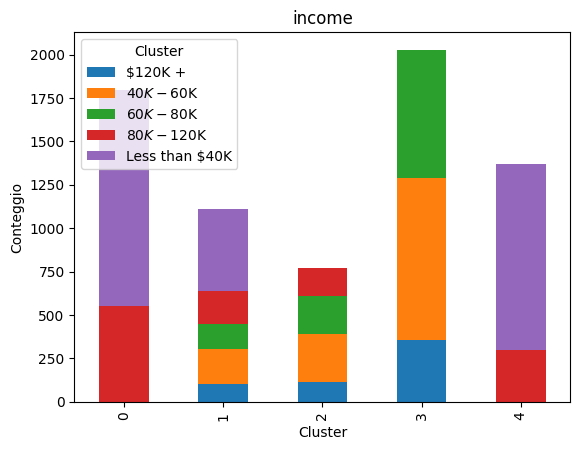

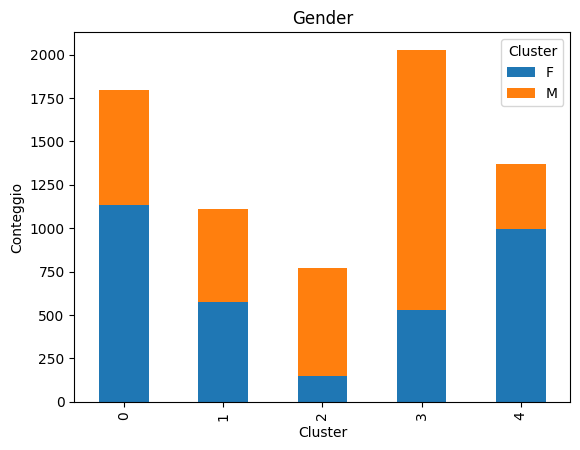

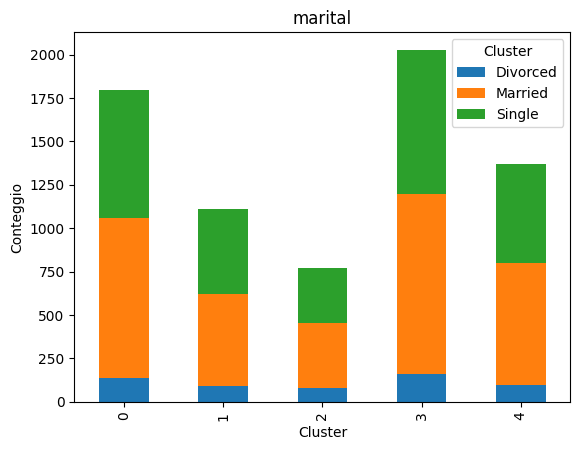

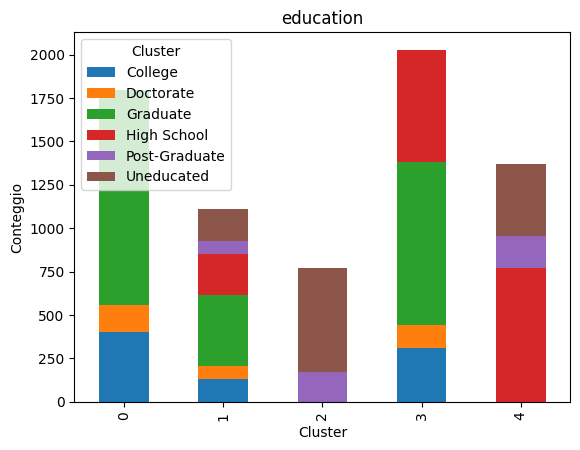

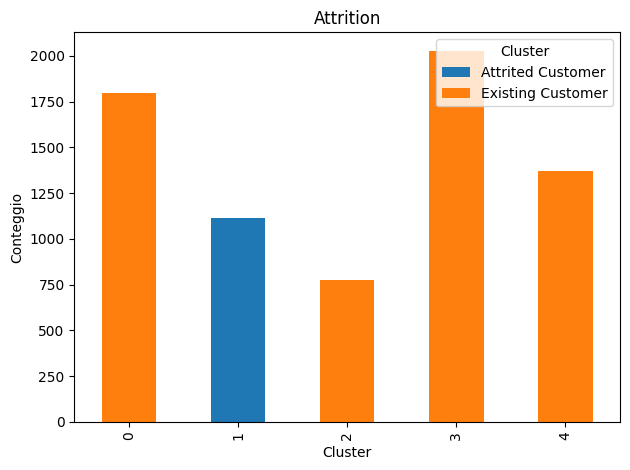

In [143]:
import matplotlib.pyplot as plt

# Crea una griglia di subplot 2x2
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(5, 5))

# Grafico 1
ax1 = axes[0, 0]
ax1 = data_subset.groupby('Cluster_Labels')['Income_Category'].value_counts().unstack().plot(kind='bar', stacked=True)
ax1.set_xlabel('Cluster')
ax1.set_ylabel('Conteggio')
ax1.set_title('income')
ax1.legend(title='Cluster')

# Grafico 2
ax2 = axes[0, 1]
ax2 = data_subset.groupby('Cluster_Labels')['Gender'].value_counts().unstack().plot(kind='bar', stacked=True)
ax2.set_xlabel('Cluster')
ax2.set_ylabel('Conteggio')
ax2.set_title('Gender')
ax2.legend(title='Cluster')

# Grafico 3
ax3 = axes[1, 0]
ax3 = data_subset.groupby('Cluster_Labels')['Marital_Status'].value_counts().unstack().plot(kind='bar', stacked=True)
ax3.set_xlabel('Cluster')
ax3.set_ylabel('Conteggio')
ax3.set_title('marital')
ax3.legend(title='Cluster')

# Grafico 4
ax4 = axes[1, 1]
ax4 = data_subset.groupby('Cluster_Labels')['Education_Level'].value_counts().unstack().plot(kind='bar', stacked=True)
ax4.set_xlabel('Cluster')
ax4.set_ylabel('Conteggio')
ax4.set_title('education')
ax4.legend(title='Cluster')

# Grafico 5
ax4 = data_subset.groupby('Cluster_Labels')['Attrition_Flag'].value_counts().unstack().plot(kind='bar', stacked=True)
ax4.set_xlabel('Cluster')
ax4.set_ylabel('Conteggio')
ax4.set_title('Attrition')
ax4.legend(title='Cluster')
# Aggiusta la disposizione dei subplot
plt.tight_layout()

# Mostra la figura
plt.show()